# Data Science and Business Analytics Internship
GRIP @ The Sparks Foundation

Thank you for giving me this Opportunity

By : Muni Chaitanya

Task - 1 Prediction Using Supervised Machine Learning.

# Importing the Required Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Extracting the data from the source

In [2]:
df = pd.read_csv('http://bit.ly/w-data')

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.head(9)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81


# Looking for Null Values

In [5]:
df.isnull().sum()
#No Null Values So No Need Of Data Cleaning 

Hours     0
Scores    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

Text(0, 0.5, 'Score')

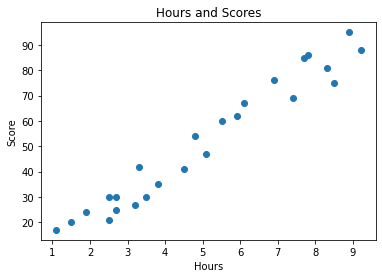

In [8]:
plt.scatter(df['Hours'],df['Scores'])
plt.title("Hours and Scores")
plt.xlabel('Hours')
plt.ylabel('Score')

# Spliting the Data

In [9]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [10]:
x = df[['Hours']]
y = df['Scores']

In [11]:
x.shape

(25, 1)

In [12]:
y.shape

(25,)

In [13]:
y.ndim

1

In [15]:
# Doing Train Test Split Function
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [16]:
x_train.shape

(17, 1)

In [17]:
y_train.shape

(17,)

# Building the Model Using Linear Regression

In [18]:
# Linear Regression Function
model = LinearRegression()

In [19]:
model.fit(x_train, y_train)

LinearRegression()

In [20]:
model.coef_

array([9.78856669])

In [21]:
model.intercept_

2.370815382341881

In [22]:
y_pred = model.predict(x_test)

In [23]:
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

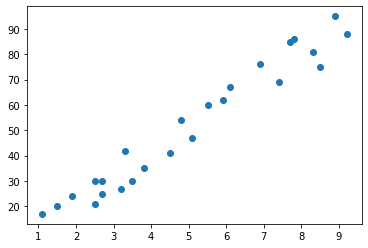

In [24]:
plt.scatter(df['Hours'] , df['Scores'])

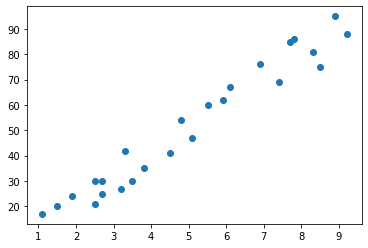

In [25]:
plt.scatter(x,y)

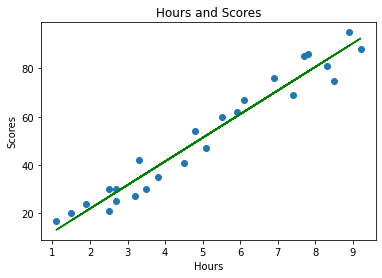

In [26]:
plt.scatter(df['Hours'],df['Scores'])
df['HSP'] = ((model.coef_)*(df['Hours'])+(model.intercept_))

plt.plot(df['Hours'],df['HSP'] , color = 'Green')
plt.title("Hours and Scores")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [27]:
df1 = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})

In [28]:
df1

,Actual,Prediction
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


Estimating the training and test score

In [29]:
print('Training Score :', model.score(x_train,y_train))
print('Test Score :', model.score(x_test,y_test))

Training Score : 0.9484997422695115
Test Score : 0.9568211104435257


# Testing with the Source data

In [30]:
df

,Hours,Scores,HSP
0,2.5,21,26.842232
1,5.1,47,52.292505
2,3.2,27,33.694229
3,8.5,75,85.573632
4,3.5,30,36.630799
5,1.5,20,17.053665
6,9.2,88,92.425629
7,5.5,60,56.207932
8,8.3,81,83.615919
9,2.7,25,28.799945


In [31]:
# hours = 8.9
pred_score = model.predict([[8.9]])
print('Predicted scores =', pred_score)

Predicted scores = [89.48905889]


# Evaulating the Model

In [32]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test , y_pred)) 
print('Mean Squared Error : ', metrics.mean_squared_error(y_test , y_pred)) 
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test , y_pred)))

Mean Absolute Error :  4.419727808027652
Mean Squared Error :  22.96509721270043
Root Mean Squared Error :  4.792191274636315
